In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib import pyplot
from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder

%matplotlib inline

pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [27]:
import os

In [28]:
df_hr = pd.read_csv('HRDataset_v14.csv')

In [29]:
df_hr

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,...,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
0,"Adinolfi, Wilson K",10026,0,0,1,1,5,4,0,62506,...,Michael Albert,22.000,LinkedIn,Exceeds,4.600,5,0,1/17/2019,0,1
1,"Ait Sidi, Karthikeyan",10084,1,1,1,5,3,3,0,104437,...,Simon Roup,4.000,Indeed,Fully Meets,4.960,3,6,2/24/2016,0,17
2,"Akinkuolie, Sarah",10196,1,1,0,5,5,3,0,64955,...,Kissy Sullivan,20.000,LinkedIn,Fully Meets,3.020,3,0,5/15/2012,0,3
3,"Alagbe,Trina",10088,1,1,0,1,5,3,0,64991,...,Elijiah Gray,16.000,Indeed,Fully Meets,4.840,5,0,1/3/2019,0,15
4,"Anderson, Carol",10069,0,2,0,5,5,3,0,50825,...,Webster Butler,39.000,Google Search,Fully Meets,5.000,4,0,2/1/2016,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
306,"Woodson, Jason",10135,0,0,1,1,5,3,0,65893,...,Kissy Sullivan,20.000,LinkedIn,Fully Meets,4.070,4,0,2/28/2019,0,13
307,"Ybarra, Catherine",10301,0,0,0,5,5,1,0,48513,...,Brannon Miller,12.000,Google Search,PIP,3.200,2,0,9/2/2015,5,4
308,"Zamora, Jennifer",10010,0,0,0,1,3,4,0,220450,...,Janet King,2.000,Employee Referral,Exceeds,4.600,5,6,2/21/2019,0,16
309,"Zhou, Julia",10043,0,0,0,1,3,3,0,89292,...,Simon Roup,4.000,Employee Referral,Fully Meets,5.000,3,5,2/1/2019,0,11


In [30]:
df_hr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311 entries, 0 to 310
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Employee_Name               311 non-null    object 
 1   EmpID                       311 non-null    int64  
 2   MarriedID                   311 non-null    int64  
 3   MaritalStatusID             311 non-null    int64  
 4   GenderID                    311 non-null    int64  
 5   EmpStatusID                 311 non-null    int64  
 6   DeptID                      311 non-null    int64  
 7   PerfScoreID                 311 non-null    int64  
 8   FromDiversityJobFairID      311 non-null    int64  
 9   Salary                      311 non-null    int64  
 10  Termd                       311 non-null    int64  
 11  PositionID                  311 non-null    int64  
 12  Position                    311 non-null    object 
 13  State                       311 non

In [31]:
df_hr.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
EmpID,311.000,10156.000,89.922,10001.000,10078.500,10156.000,10233.500,10311.000
MarriedID,311.000,0.399,0.490,0.000,0.000,0.000,1.000,1.000
MaritalStatusID,311.000,0.810,0.943,0.000,0.000,1.000,1.000,4.000
GenderID,311.000,0.434,0.496,0.000,0.000,0.000,1.000,1.000
EmpStatusID,311.000,2.392,1.794,1.000,1.000,1.000,5.000,5.000
DeptID,311.000,4.611,1.083,1.000,5.000,5.000,5.000,6.000
PerfScoreID,311.000,2.977,0.587,1.000,3.000,3.000,3.000,4.000
FromDiversityJobFairID,311.000,0.093,0.291,0.000,0.000,0.000,0.000,1.000
Salary,311.000,69020.685,25156.637,45046.000,55501.500,62810.000,72036.000,250000.000
Termd,311.000,0.334,0.473,0.000,0.000,0.000,1.000,1.000


In [48]:
X = df_hr[['MarriedID', 'MaritalStatusID', 'DeptID', 'PerfScoreID', 'PositionID', 'EmpSatisfaction', 'SpecialProjectsCount']]
y = df_hr[['Salary']]

In [50]:
X

,MarriedID,MaritalStatusID,DeptID,PerfScoreID,PositionID,EmpSatisfaction,SpecialProjectsCount
0,0,0,5,4,19,5,0
1,1,1,3,3,27,3,6
2,1,1,5,3,20,3,0
3,1,1,5,3,19,5,0
4,0,2,5,3,19,4,0
...,...,...,...,...,...,...,...
306,0,0,5,3,20,4,0
307,0,0,5,1,19,2,0
308,0,0,3,4,6,5,6
309,0,0,3,3,9,3,5


<AxesSubplot:title={'center':'Correlation of Features'}>

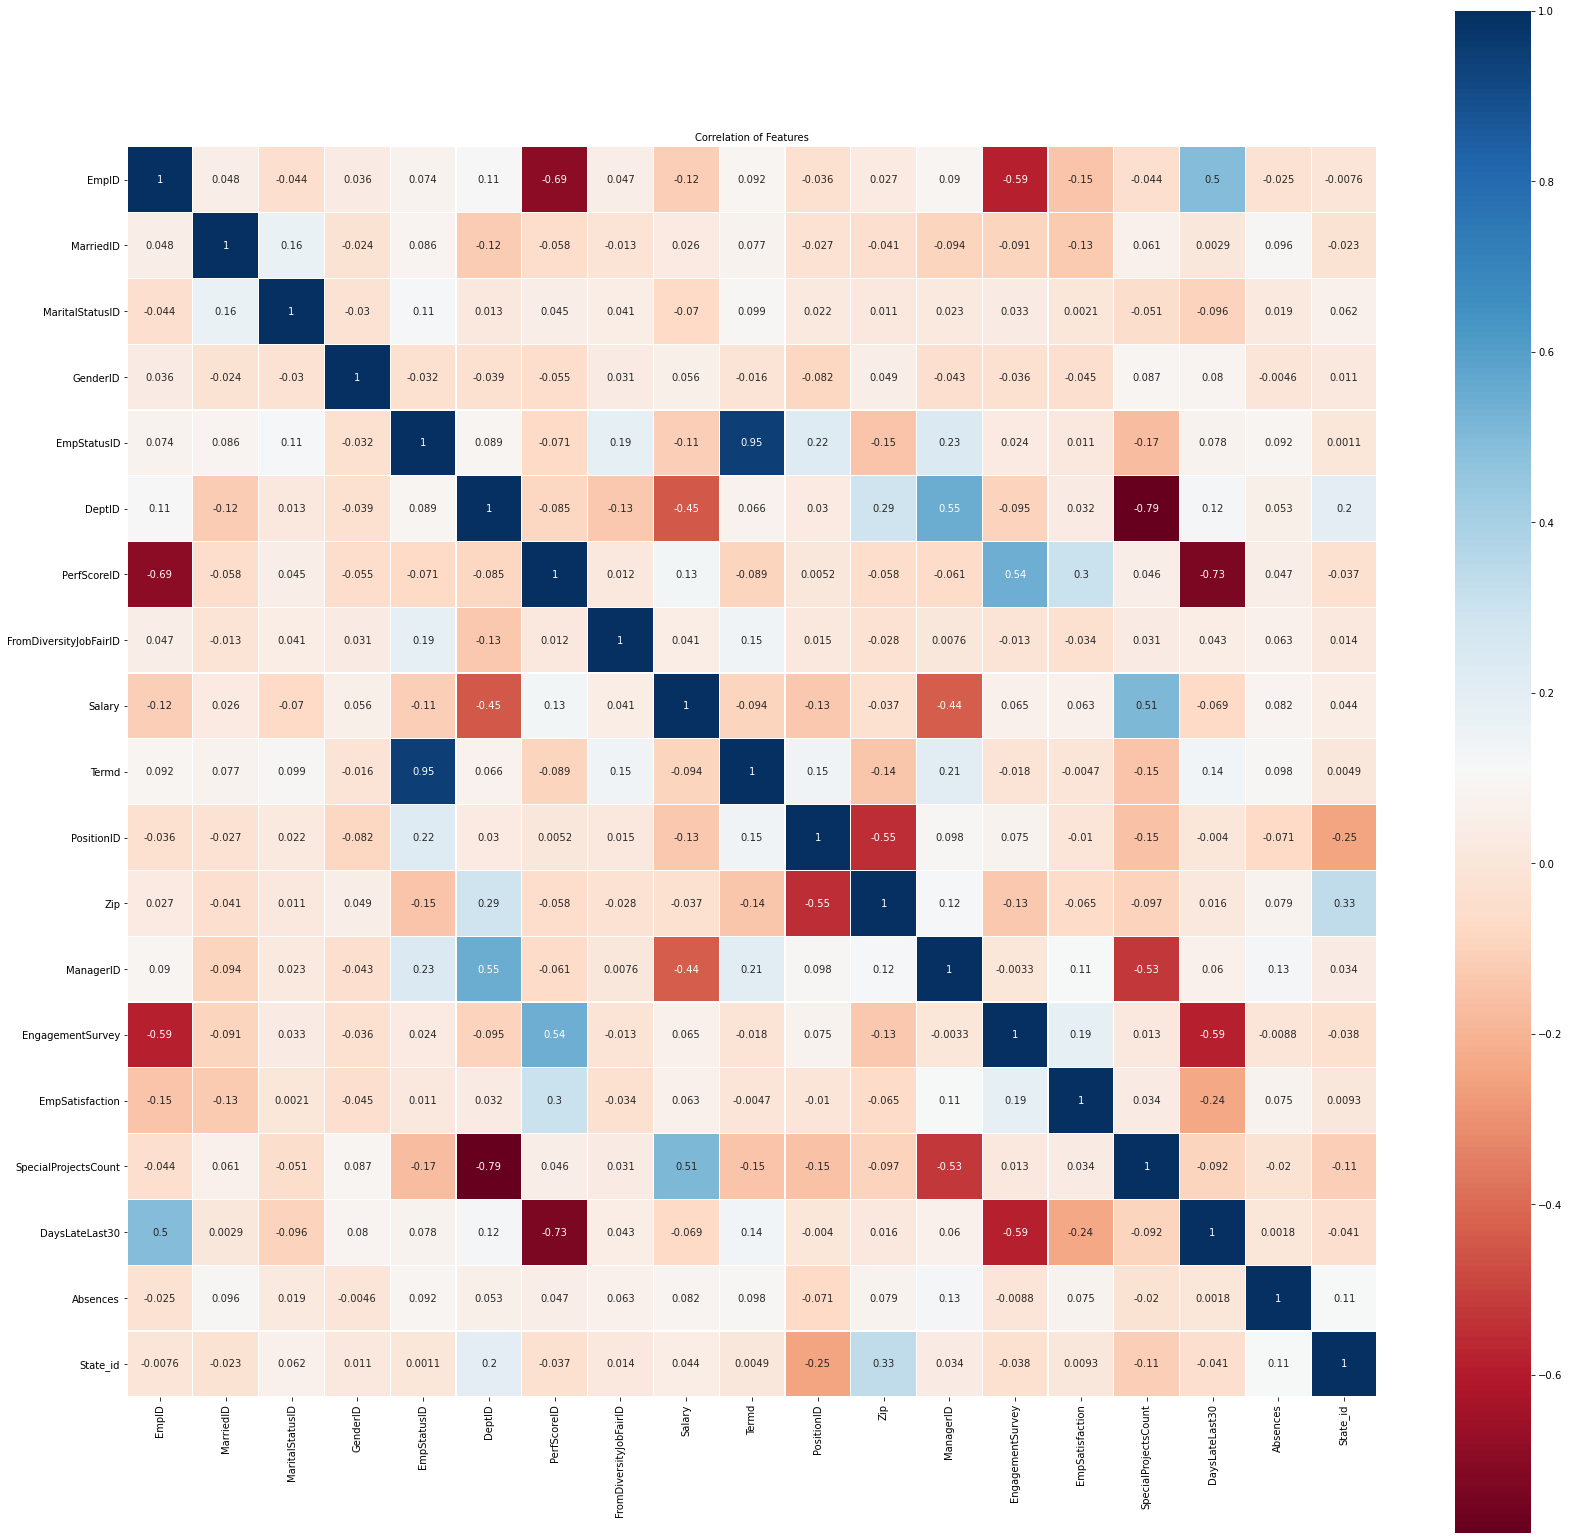

In [81]:
colormap = plt.cm.RdBu
plt.figure(figsize=(28,28))
plt.title('Correlation of Features', y=1.0, size=10)
sns.heatmap(df_hr.corr(),linewidths=0.2,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)

In [52]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(248, 7)
(63, 7)
(248, 1)
(63, 1)


In [54]:
lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)

LinearRegression()

In [55]:
importance = lin_model.coef_

print(importance)

[[ 1517.74204556 -1347.40107733 -2866.59535406  2891.55636358
   -182.22564328   698.45118922  3542.27308623]]


In [57]:
def model_access(lin_model, X_train, X_test, Y_train, Y_test):

    y_train_predict = lin_model.predict(X_train)
    rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))
    r2 = r2_score(Y_train, y_train_predict)

    
    print("\n")
    print("The model performance for training set")
    print("--------------------------------------")
    print('RMSE is {}'.format(rmse))
    print('R2 score is {}'.format(r2))
    print("--------------------------------------")
    print("\n")

    
    y_test_predict = lin_model.predict(X_test)
    rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
    r2 = r2_score(Y_test, y_test_predict)

    print("The model performance for testing set")
    print("--------------------------------------")
    print('RMSE is {}'.format(rmse))
    print('R2 score is {}'.format(r2))

In [58]:
model_access(lin_model, X_train, X_test, Y_train, Y_test)



The model performance for training set
--------------------------------------
RMSE is 21191.638523978876
R2 score is 0.2295980192727235
--------------------------------------


The model performance for testing set
--------------------------------------
RMSE is 22109.817459972408
R2 score is 0.3960606862200369


In [66]:
def scaling(df):
    scaler = MinMaxScaler() 
    data_scaled = scaler.fit_transform(df)
    df_scaled = pd.DataFrame(data_scaled)
    return df_scaled

In [67]:
X = df_hr[['MarriedID', 'MaritalStatusID', 'DeptID', 'PerfScoreID', 'PositionID', 'EmpSatisfaction', 'SpecialProjectsCount', 'Zip']]

X_scaled = scaling(X)

X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, y, test_size = 0.2, random_state=42)

lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)

importance = lin_model.coef_
print(importance)

[[  1653.59000082  -5550.85550861 -16087.24016112   8816.46412093
   -3084.23176896   3206.21062603  27805.39820063   5626.84591458]]


In [68]:
temp_df = pd.DataFrame(df_hr[['State']])
labelencoder = LabelEncoder()
df_hr['State_id'] = labelencoder.fit_transform(temp_df['State'])

In [69]:
X = df_hr[['MaritalStatusID', 'DeptID', 'PerfScoreID', 'SpecialProjectsCount', 'State_id', 'Absences', 'DaysLateLast30']]

X_scaled = scaling(X)

X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, y, test_size = 0.2, random_state=42)

lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)

importance = lin_model.coef_
print(importance)

[[ -5478.29985566 -20917.77827005  19037.98544043  27344.23923201
   34999.73952768   7078.51844914  12739.82983469]]


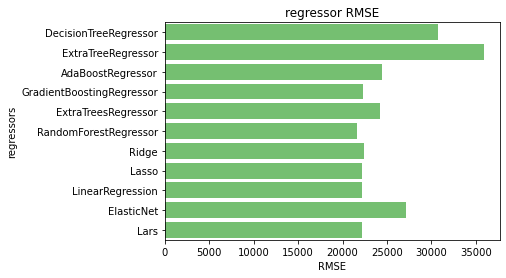

In [90]:
sns.set_color_codes("muted")
sns.barplot(x='MSE', y='regressors', data=log, color="g")

plt.xlabel('RMSE')
plt.title('regressor RMSE')
plt.show()

In [91]:
model_access(lin_model, X_train, X_test, Y_train, Y_test)



The model performance for training set
--------------------------------------
RMSE is 20712.06475008665
R2 score is 0.264072374065648
--------------------------------------


The model performance for testing set
--------------------------------------
RMSE is 22156.15118436136
R2 score is 0.39352678214380865


In [93]:

X = df_hr[['MaritalStatusID', 'DeptID', 'PerfScoreID', 'SpecialProjectsCount', 'State_id', 'Absences', 'DaysLateLast30', 'GenderID']]

X_scaled = scaling(X)

X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, y, test_size = 0.2, random_state=42)

lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)

importance = lin_model.coef_
print(importance)

[[ -5474.36101693 -21031.76583477  18975.87526734  27195.6024111
   35046.74054762   7066.71270995  12594.02186959    548.33989308]]


In [95]:
model_access(lin_model, X_train, X_test, Y_train, Y_test)



The model performance for training set
--------------------------------------
RMSE is 20710.314300170838
R2 score is 0.264196760507178
--------------------------------------


The model performance for testing set
--------------------------------------
RMSE is 22153.395701087476
R2 score is 0.3936776226826594


In [103]:
temp_df = pd.DataFrame(df_hr[['MaritalDesc']])
labelencoder = LabelEncoder()
df_hr['MaritalDesc_id'] = labelencoder.fit_transform(temp_df['MaritalDesc'])
#люблю число 8
df_hr.head(8)

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,...,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences,State_id,MaritalDesc_id,ManagerID_id
0,"Adinolfi, Wilson K",10026,0,0,1,1,5,4,0,62506,...,Exceeds,4.600,5,0,1/17/2019,0,1,10,3,20
1,"Ait Sidi, Karthikeyan",10084,1,1,1,5,3,3,0,104437,...,Fully Meets,4.960,3,6,2/24/2016,0,17,10,1,3
2,"Akinkuolie, Sarah",10196,1,1,0,5,5,3,0,64955,...,Fully Meets,3.020,3,0,5/15/2012,0,3,10,1,18
3,"Alagbe,Trina",10088,1,1,0,1,5,3,0,64991,...,Fully Meets,4.840,5,0,1/3/2019,0,15,10,1,14
4,"Anderson, Carol",10069,0,2,0,5,5,3,0,50825,...,Fully Meets,5.000,4,0,2/1/2016,0,2,10,0,22
5,"Anderson, Linda",10002,0,0,0,1,5,4,0,57568,...,Exceeds,5.000,5,0,1/7/2019,0,15,10,3,9
6,"Andreola, Colby",10194,0,0,0,1,4,3,0,95660,...,Fully Meets,3.040,3,4,1/2/2019,0,19,10,3,8
7,"Athwal, Sam",10062,0,4,1,1,5,3,0,59365,...,Fully Meets,5.000,4,0,2/25/2019,0,19,10,4,17


In [100]:
X = df_hr[['MaritalStatusID', 'DeptID', 'PerfScoreID', 'SpecialProjectsCount', 'State_id', 'Absences', 'DaysLateLast30', 'GenderID', 'MaritalDesc_id']]

X_scaled = scaling(X)

X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, y, test_size = 0.2, random_state=42)

lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)

importance = lin_model.coef_
print(importance)

[[ -4544.7593338  -21346.38406656  18938.33402441  27110.18140897
   35119.95643333   7146.31210443  12603.73918964    543.18607384
    1481.9644627 ]]


In [101]:
model_access(lin_model, X_train, X_test, Y_train, Y_test)



The model performance for training set
--------------------------------------
RMSE is 20707.220348082366
R2 score is 0.2644165900943377
--------------------------------------


The model performance for testing set
--------------------------------------
RMSE is 22129.599743586437
R2 score is 0.3949794793211733


In [104]:
temp_df = pd.DataFrame(df_hr[['ManagerID']])
labelencoder = LabelEncoder()
df_hr['ManagerID_id'] = labelencoder.fit_transform(temp_df['ManagerID'])

df_hr.head(8)

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,...,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences,State_id,MaritalDesc_id,ManagerID_id
0,"Adinolfi, Wilson K",10026,0,0,1,1,5,4,0,62506,...,Exceeds,4.600,5,0,1/17/2019,0,1,10,3,20
1,"Ait Sidi, Karthikeyan",10084,1,1,1,5,3,3,0,104437,...,Fully Meets,4.960,3,6,2/24/2016,0,17,10,1,3
2,"Akinkuolie, Sarah",10196,1,1,0,5,5,3,0,64955,...,Fully Meets,3.020,3,0,5/15/2012,0,3,10,1,18
3,"Alagbe,Trina",10088,1,1,0,1,5,3,0,64991,...,Fully Meets,4.840,5,0,1/3/2019,0,15,10,1,14
4,"Anderson, Carol",10069,0,2,0,5,5,3,0,50825,...,Fully Meets,5.000,4,0,2/1/2016,0,2,10,0,22
5,"Anderson, Linda",10002,0,0,0,1,5,4,0,57568,...,Exceeds,5.000,5,0,1/7/2019,0,15,10,3,9
6,"Andreola, Colby",10194,0,0,0,1,4,3,0,95660,...,Fully Meets,3.040,3,4,1/2/2019,0,19,10,3,8
7,"Athwal, Sam",10062,0,4,1,1,5,3,0,59365,...,Fully Meets,5.000,4,0,2/25/2019,0,19,10,4,17


In [105]:
X = df_hr[['ManagerID_id','DeptID', 'PerfScoreID', 'EmpSatisfaction', 'SpecialProjectsCount', 'PositionID', 'MaritalDesc_id', 'DaysLateLast30', 'GenderID']]

X_scaled = scaling(X)

X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, y, test_size = 0.2, random_state=42)

lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)

importance = lin_model.coef_
print(importance)

[[-23574.87032709  -3756.03133044  14126.17927256   5775.0364399
   23000.07635063  -4227.28060357   3734.48939237   8836.95497528
     286.90813348]]


In [106]:
model_access(lin_model, X_train, X_test, Y_train, Y_test)



The model performance for training set
--------------------------------------
RMSE is 20557.13176228276
R2 score is 0.275041151529438
--------------------------------------


The model performance for testing set
--------------------------------------
RMSE is 20569.199219396094
R2 score is 0.4772936740639918


In [108]:
#Выводы:
#получено: RMSE - 20569.2 / R2 - 0.477
#с использованием LabelEncoder мы присвоили новые id менеджерам
#+ SpecialProjectsCount ->> взаимосвязь этого фактора с зарплатой